<a target="_blank" href="https://colab.research.google.com/github/ENVIRON-ENERGY716/Fall2023/blob/main/Labs/Lab12/Lab12_Montecarlo_simulation_Mean_Reverting_and_Wiener_process.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Lab 12: Montecarlo simulation - Browian Motion (i.e. Wiener Process) and OU Mean Reverting Process


In [13]:
import  numpy as np

## 1. Random Walk with Mean Reversion

Xt is a random variable that we will observe at times t=1, t=2, t=3 etc... where the time elapsed betwen t and t-1 is one month.

Suppose Xt represents oil prices in dollars per bbl.

Past analysis shows that the collection of random variables Xt follow a Random Walk with Mean Reversion (i.e., a Mean Reverting Process).  

Simulate this process for 100 observations assuming that:

  The value of Xt at time t=0, i.e., today's price is 48 dollars per bbl.
  The long term average (i.e., the mean) of oil prices is 50 dollars per bbl.
  The mean reversion speed is 0.05 per annum.
  The volatility is 0.99 per annum.

#### Step 1:

Set up the parameters of this stochastic process

In [14]:
#Assume:
# today's price is 48 $/bbl
# the long term average is 50 $/bbl
# the mean reversion speed is 0.05 per annum
# the volatility is 0.99 per annum

X_zero=48 #$/bbl
X_bar=50 #$/bbl  #Long term mean to which the values will return to
alpha = 0.05 # mean reversion speed per annnum
delta_t = 1/12 # there are 12 months in a year and the parameter is given per annum
sigma = 0.99 # volatility per annum

#### Step 2:

Simulate 100 i.i.d random variables from a normal probability distribution with mean 0 and standard deviation 1. Call each realization Et (this is epsilon in the slides). Save all the Et realizations for t=1, t=2, t=3,..t=100 in the an array and calle it E_arrray

In [15]:
#E_array=data_normal
E_array=np.random.standard_normal(size=100)
print(E_array)

[-2.59793590e-01 -5.10677690e-01  1.37755555e+00  2.72709897e-01
  2.72354274e-01  1.16023038e+00  5.57049962e-02  1.24324196e+00
  1.23977889e-01 -8.31503484e-01 -1.22473095e+00  1.73023782e-01
  3.08290216e-01 -4.04857089e-01 -2.49120266e-01 -2.67674552e-01
 -1.23194471e+00  7.53317909e-01 -1.39341738e+00  1.04159283e-01
  3.86027014e-01  2.18429754e-01 -2.64096489e-02 -1.42028871e+00
  9.26503185e-01  1.14347893e+00 -1.77618755e+00  1.29466372e+00
 -1.77820621e+00  1.46396329e-01  2.07967648e-01  7.82743037e-01
  5.59993074e-01 -1.24240061e+00  6.26787261e-02 -2.46106876e-01
 -8.80870411e-01  8.52199213e-01 -1.73086717e+00  1.07222216e+00
  1.76469902e-01 -1.28952498e+00  1.31581911e+00 -2.73650190e+00
  1.46398667e-01  6.96045652e-01 -7.64866063e-02  3.36788785e-01
 -1.26803808e+00 -7.20519641e-01 -1.64000111e+00  4.03324099e-02
 -1.04596712e+00 -7.68670937e-02  1.68765861e+00 -7.56594973e-01
  4.26125189e-01 -8.35708815e-01  2.03048431e+00  5.91646927e-01
 -3.25075660e-01 -4.09775

#### Step 3:

Use the Mean Reversion Formula for $t=1$:

$$
X_1 = X_0 + \alpha \cdot \delta t \cdot (\bar{X} - X_0) + \sigma * \delta t * E_1
$$

Then use the value obtained for X1 to simulate the value of X2:  

$$
X_2 = X_1 + \alpha \cdot \delta t \cdot (\bar{X} - X_1) + \sigma * \delta t * E_2
$$

And so on, until simulating X100

In [16]:
Xt=np.arange(100,dtype=float) #start with an empty array to store all the Zt variables
Xt[0]=X_zero #The instructions provided the value at time 0
for i in range(1, 100):
    Xt[i]=Xt[i-1]+alpha*delta_t*(X_bar-Xt[i-1])+sigma*delta_t*E_array[i]
print(Xt)

[48.         47.96620242 48.08832491 48.11878879 48.1490964  48.25252751
 48.2644043  48.37420341 48.39120574 48.32931001 48.23523092 48.25685858
 48.28955562 48.26328176 48.24996566 48.23517432 48.14089232 48.21078733
 48.10328545 48.11978157 48.15946304 48.1851524  48.19053547 48.08090109
 48.16533385 48.2673153  48.12799935 48.24260911 48.10322956 48.12321046
 48.14818775 48.22047993 48.27409403 48.17878725 48.19154664 48.17877804
 48.11369466 48.1918607  48.05659807 48.15315391 48.17540787 48.07662452
 48.19319366 47.97496062 47.99547617 48.06125212 48.06302009 48.09887591
 48.00218412 47.95106548 47.82430262 47.83669545 47.75941693 47.76241116
 47.91096628 47.8572515  47.90133495 47.84113341 48.01764364 48.07471433
 48.05591761 48.03021149 48.01558988 48.02399299 48.09076629 48.18555428
 48.1954364  48.0685801  48.25913514 48.29723417 48.33004745 48.32432833
 48.47417501 48.36247352 48.29879026 48.38135066 48.27631074 48.20418048
 48.18339003 48.1884856  48.29440861 48.18807723 48

Optional step: Plot the simulated values

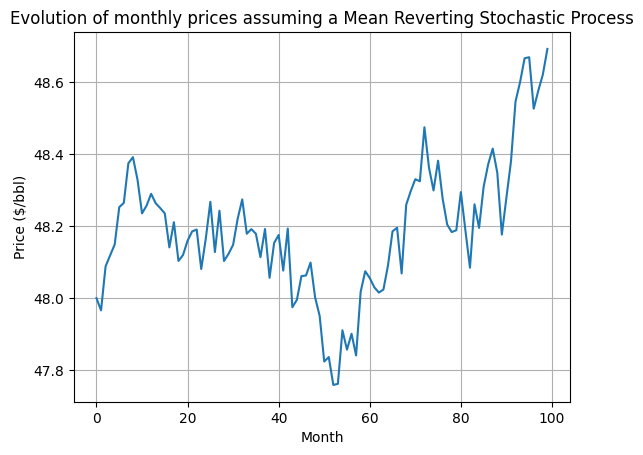

In [17]:
# now plot the prices
import matplotlib.pyplot as plt
plt.plot(Xt)
plt.xlabel("Month")
plt.ylabel('Price ($/bbl)')
plt.title('Evolution of monthly prices assuming a Mean Reverting Stochastic Process')
plt.grid(True)
plt.show()

## 2. Wiener (Brownian Motion) Process

Zt is a random variable that we will observe at times t=1, t=2, t=3 etc... Past analysis shows that the collection of random variables Zt follow a Wiener Process.  
Simulate this process for 100 observations assuming that:
-The value of Zt at time t=0 is zero.
-Delta t is 1/12  (i.e., we are observing the variable every 1/12 of a year (i.e., a month)

Step 1: Simulate 100 i.i.d random variables from a normal probability distribution with mean 0 and standard deviation 1. Call each realization Et (this is epsilon in the slides). Save all the Et realizations for t=1, t=2, t=3,..t=100 in the an array and calle it E_arrray

In [18]:
#E_array=data_normal
E_array=np.random.standard_normal(size=100)
print(E_array)

[ 5.14636993e-02 -1.11205845e+00 -3.51830231e-02 -1.11712829e+00
  1.18389362e+00  6.07423466e-01 -1.83884891e+00 -8.59362668e-01
  5.47860281e-01 -3.92160206e-01  7.66380051e-01  1.13244204e+00
  3.43801078e-03  5.50990473e-01 -5.83674400e-01  7.10079118e-01
  1.38971659e+00 -1.23968080e+00  6.50431928e-01 -1.87599989e+00
 -1.64225245e+00  1.14670772e-01  2.20896668e+00 -1.03426029e+00
 -1.58231286e+00 -1.75687556e-01  6.60603540e-02  1.47988804e+00
  2.63635020e-01  2.06033751e+00 -1.42186016e-01 -5.46266744e-01
 -3.83038401e-01  1.71595007e-01  2.68953687e-01  7.32532978e-01
  2.05599871e+00 -7.36262967e-01 -1.55423703e+00  3.53992711e-01
 -1.30768814e+00 -3.00717680e-01  6.83342930e-01 -7.20660006e-01
  3.55052192e+00 -7.16726099e-01 -1.68350932e+00  2.25001522e-01
 -6.82281899e-01 -1.83132390e+00  2.74112393e-01  1.27475634e+00
 -1.99001759e+00 -9.52091673e-01  3.66511612e-01  2.67221675e+00
  2.75187683e-01  8.94801340e-01 -2.05206289e-01  1.75799405e-01
 -4.67993757e-01  8.66157

Step 2: Generate 100 random variables that represent delta_Z, which is the change in Z from time t-1 to time t.
delta_Z=Et*delta_t

In [19]:
delta_t = 1/12 # there are 12 months in a year and the parameter is given per annum
delta_z=delta_t*E_array

Step 3: To simulate Z1 use the formula Z1=Z0+delta_z1. To simulate Z2 use the formula Z2=Z1+delat_z2 and so on

In [20]:
Zt=np.arange(100,dtype=float) #start with an empty array to store all the Zt variables
Zt[0]=0 #The instructions say that the value at time 0 is 0
for i in range(1, 100):
    Zt[i]=Zt[i-1]+delta_z[i-1]
print(Zt)

[ 0.          0.00428864 -0.0883829  -0.09131481 -0.18440884 -0.08575104
 -0.03513242 -0.18836982 -0.25998338 -0.21432836 -0.24700837 -0.18314337
 -0.0887732  -0.0884867  -0.04257083 -0.09121036 -0.0320371   0.08377262
 -0.01953412  0.03466854 -0.12166478 -0.25851915 -0.24896325 -0.0648827
 -0.15107105 -0.28293046 -0.29757109 -0.29206606 -0.16874206 -0.14677247
  0.02492232  0.01307349 -0.03244874 -0.06436861 -0.05006903 -0.02765622
  0.0333882   0.20472142  0.14336618  0.01384642  0.04334582 -0.0656282
 -0.090688   -0.03374276 -0.09379776  0.20207907  0.14235189  0.00205945
  0.02080958 -0.03604725 -0.18865757 -0.16581487 -0.05958518 -0.22541998
 -0.30476095 -0.27421832 -0.05153359 -0.02860128  0.0459655   0.02886497
  0.04351492  0.00451544  0.01173342  0.1264455   0.01729546 -0.03065006
  0.01544652 -0.0058206   0.09964144 -0.10847445 -0.00841007  0.00568988
  0.01101406  0.0734865   0.09139248  0.0948488   0.21775636  0.11526046
  0.11206099  0.16419712  0.36990986  0.32264168  0.2

Optional step: Plot the simulated values

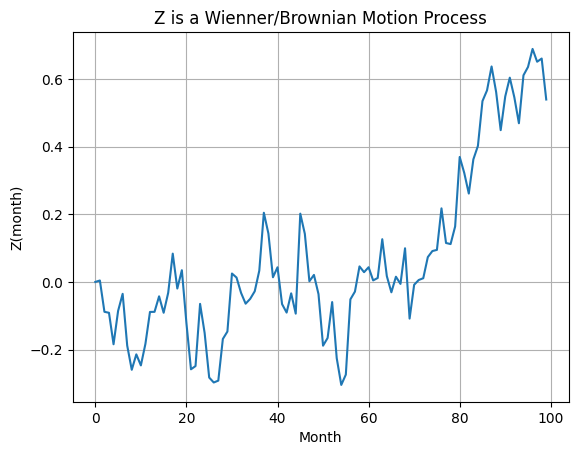

In [21]:
# now plot the prices
import matplotlib.pyplot as plt
plt.plot(Zt)
plt.xlabel("Month")
plt.ylabel('Z(month)')
plt.title('Z is a Wienner/Brownian Motion Process')
plt.grid(True)
plt.show()

## 3. OU Mean Reverting Process

Look at the Excel file with the OU simulation process and code it here.  Make sure you code the OU that always simulates NON NEGATIVE PRICES